In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('Stocks/a.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [3]:
df.rename(columns = {'Date' : 'ds', 'Close' : 'y'}, inplace=True)

In [4]:
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.drop(df.columns[[1, 2, 3, 5, 6]], axis=1, inplace=True)

<AxesSubplot:>

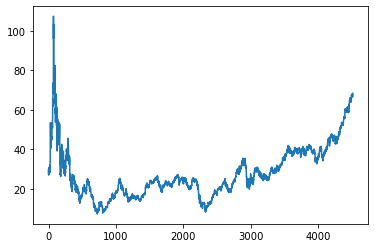

In [6]:
df['y'].plot()

In [7]:
while True:
    X = df['y'].values
    result = adfuller(X)
    if result[0] < result[4]['5%']:
        break
    else:
        df['y'] = df['y'] - df['y'].shift(1)
        df.dropna(axis=0, inplace=True)

<AxesSubplot:>

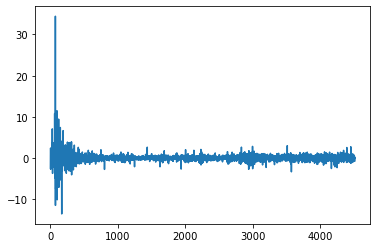

In [8]:
df['y'].plot()

In [9]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future_days = model.make_future_dataframe(periods=365)
prediction = model.predict(future_days)

In [11]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4880,2018-11-06,-0.346775,-1.201204,1.483640,-0.349390,-0.343611,0.430826,0.430826,0.430826,0.405085,0.405085,0.405085,0.025742,0.025742,0.025742,0.0,0.0,0.0,0.084051
4881,2018-11-07,-0.346747,-1.326001,1.376316,-0.349377,-0.343582,0.435259,0.435259,0.435259,0.407090,0.407090,0.407090,0.028169,0.028169,0.028169,0.0,0.0,0.0,0.088512
4882,2018-11-08,-0.346720,-1.260900,1.538474,-0.349384,-0.343552,0.477615,0.477615,0.477615,0.446728,0.446728,0.446728,0.030886,0.030886,0.030886,0.0,0.0,0.0,0.130895
4883,2018-11-09,-0.346692,-1.326284,1.420040,-0.349389,-0.343515,0.458719,0.458719,0.458719,0.424856,0.424856,0.424856,0.033863,0.033863,0.033863,0.0,0.0,0.0,0.112028
4884,2018-11-10,-0.346664,-2.758284,0.039703,-0.349394,-0.343479,-0.998021,-0.998021,-0.998021,-1.035080,-1.035080,-1.035080,0.037058,0.037058,0.037058,0.0,0.0,0.0,-1.344685


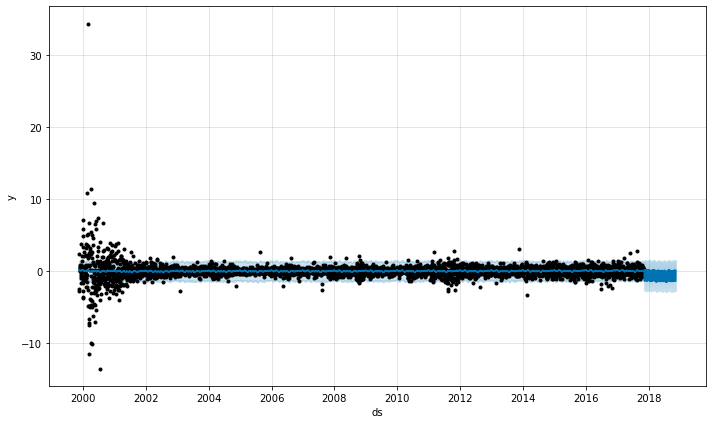

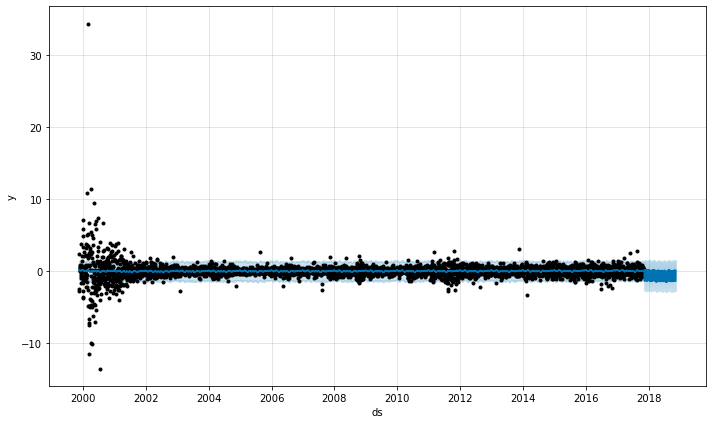

In [12]:
model.plot(prediction)

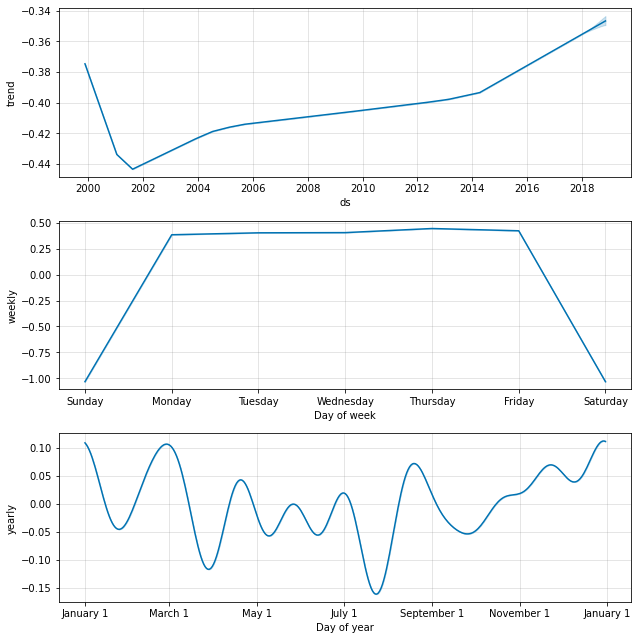

In [13]:
fig2 = model.plot_components(prediction)